In [35]:
!pip install pandas
import pandas as pd
df=pd.read_csv("credit_customers.csv")

In [36]:

df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [37]:
df.drop('savings_status', axis=1,inplace=True)
df.drop('checking_status', axis=1,inplace=True)

In [38]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
label_encoder = LabelEncoder()




df['duration'] = label_encoder.fit_transform(df['duration'])
df['credit_history'] = label_encoder.fit_transform(df['credit_history'])
df['purpose'] = label_encoder.fit_transform(df['purpose'])
df['credit_amount'] = label_encoder.fit_transform(df['credit_amount'])
df['employment'] = label_encoder.fit_transform(df['employment'])
df['installment_commitment'] = label_encoder.fit_transform(df['installment_commitment'])
df['personal_status'] = label_encoder.fit_transform(df['personal_status'])
df['other_parties'] = label_encoder.fit_transform(df['other_parties'])
df['residence_since'] = label_encoder.fit_transform(df['residence_since'])
df['property_magnitude'] = label_encoder.fit_transform(df['property_magnitude'])
df['age'] = label_encoder.fit_transform(df['age'])
df['other_payment_plans'] = label_encoder.fit_transform(df['other_payment_plans'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['existing_credits'] = label_encoder.fit_transform(df['existing_credits'])
df['job'] = label_encoder.fit_transform(df['job'])
df['num_dependents'] = label_encoder.fit_transform(df['num_dependents'])
df['own_telephone'] = label_encoder.fit_transform(df['own_telephone'])
df['foreign_worker'] = label_encoder.fit_transform(df['foreign_worker'])
df['class'] = label_encoder.fit_transform(df['class'])

In [39]:
df

,duration,credit_history,purpose,credit_amount,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,1,6,142,3,3,3,2,3,3,48,1,1,1,1,0,1,1,1
1,29,3,6,770,0,1,0,2,1,3,3,1,1,0,1,0,0,1,0
2,8,1,2,390,1,1,3,2,2,3,30,1,1,0,3,1,0,1,1
3,26,3,3,848,1,1,3,1,3,1,26,1,0,0,1,1,0,1,1
4,17,2,4,734,0,2,3,2,3,2,34,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8,3,3,310,1,2,0,2,3,3,12,1,1,0,3,0,0,1,1
996,21,3,9,661,0,3,1,2,3,1,21,1,1,0,0,0,1,1,1
997,8,3,6,69,3,3,3,2,3,0,19,1,1,0,1,0,0,1,1
998,27,3,6,332,0,3,3,2,3,2,4,1,0,0,1,0,1,1,0


Price IQR chegaralari: -467.5 - 1362.5
Aniqlangan chiqib ketgan qiymatlar:
Empty DataFrame
Columns: [duration, credit_history, purpose, credit_amount, employment, installment_commitment, personal_status, other_parties, residence_since, property_magnitude, age, other_payment_plans, housing, existing_credits, job, num_dependents, own_telephone, foreign_worker, class]
Index: []
Tozalangan data shakli: (1000, 19)


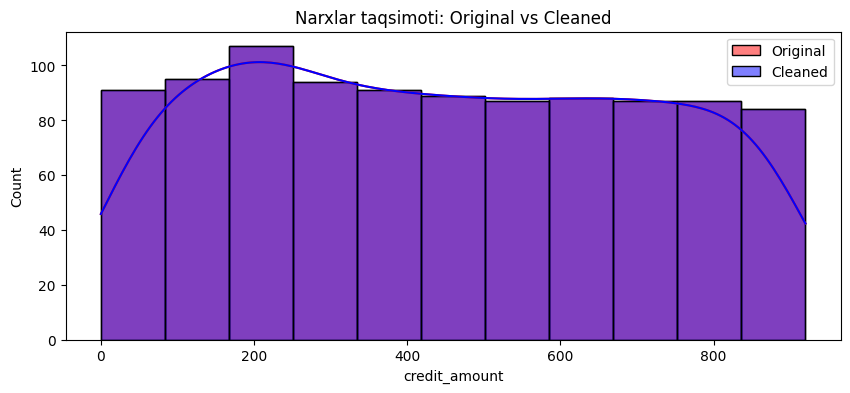

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


# 2. IQR usuli bilan Outlier aniqlash
Q1 = df['credit_amount'].quantile(0.25)
Q3 = df['credit_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Price IQR chegaralari: {lower_bound} - {upper_bound}")

# Outlierlar
outliers = df[(df['credit_amount'] < lower_bound) | (df['credit_amount'] > upper_bound)]
print("Aniqlangan chiqib ketgan qiymatlar:")
print(outliers)

# 3. Outlierlarni tozalash
df_cleaned = df[(df['credit_amount'] >= lower_bound) & (df['credit_amount'] <= upper_bound)]
print(f"Tozalangan data shakli: {df_cleaned.shape}")

# 4. Qiyoslash
plt.figure(figsize=(10, 4))
sns.histplot(df['credit_amount'], color='red', label='Original', kde=True)
sns.histplot(df_cleaned['credit_amount'], color='blue', label='Cleaned', kde=True)
plt.legend()
plt.title("Narxlar taqsimoti: Original vs Cleaned")
plt.show()

Price IQR chegaralari: -14.5 - 45.5
Aniqlangan chiqib ketgan qiymatlar:
     duration  credit_history  purpose  credit_amount  employment  \
0           2               1        6            142           3   
75          8               1        9            270           3   
137         8               3        6             61           0   
163         6               3        4            825           4   
179        15               1        4             19           3   
186         5               0        9            742           3   
187        12               1        4            143           4   
213        21               2        0            348           3   
330        17               1        9            803           4   
430         1               3        0            612           1   
438        26               1        7            602           4   
536         2               3        4            222           4   
554         5               3  

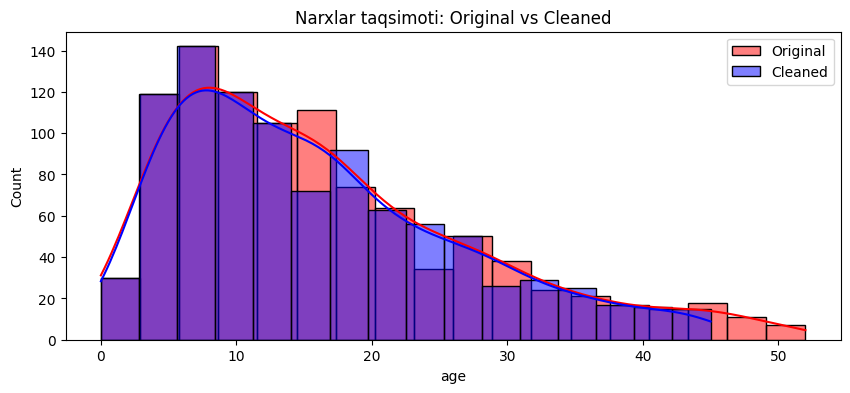

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


# 2. IQR usuli bilan Outlier aniqlash
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Price IQR chegaralari: {lower_bound} - {upper_bound}")

# Outlierlar
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print("Aniqlangan chiqib ketgan qiymatlar:")
print(outliers)

# 3. Outlierlarni tozalash
df_cleaned = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
print(f"Tozalangan data shakli: {df_cleaned.shape}")

# 4. Qiyoslash
plt.figure(figsize=(10, 4))
sns.histplot(df['age'], color='red', label='Original', kde=True)
sns.histplot(df_cleaned['age'], color='blue', label='Cleaned', kde=True)
plt.legend()
plt.title("Narxlar taqsimoti: Original vs Cleaned")
plt.show()

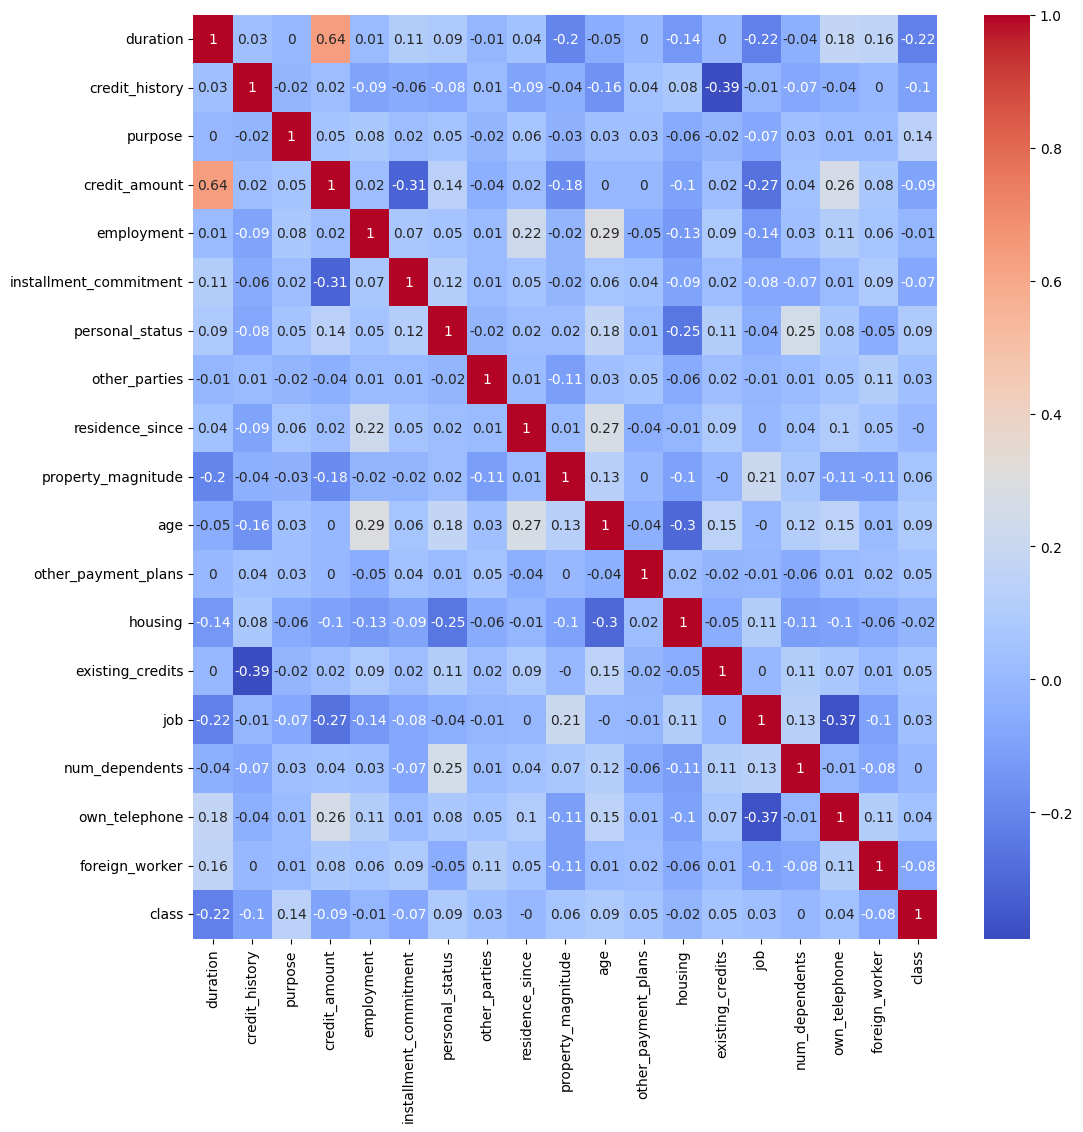

In [50]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')
plt.show()

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
scaled_data = df.copy()
scaled_data[['credit_amount']] = scaler.fit_transform(df[['credit_amount']])

Text(0.5, 1.0, 'Standartlashtirilgan Data Histogrammasi')

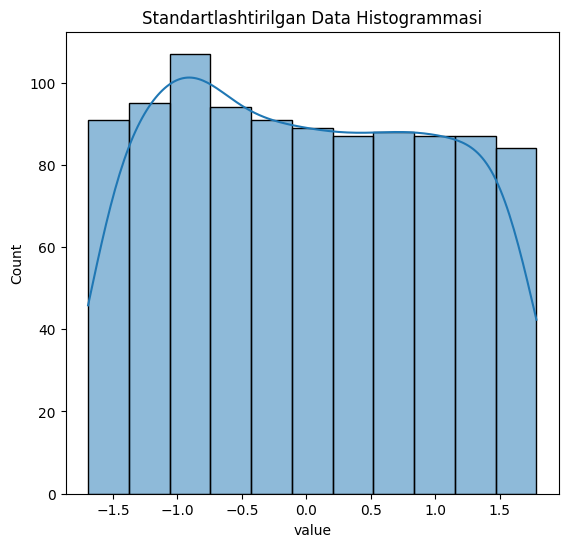

In [49]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(scaled_data[['credit_amount']].melt()['value'], kde=True)
plt.title("Standartlashtirilgan Data Histogrammasi")

In [51]:
df

,duration,credit_history,purpose,credit_amount,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,1,6,142,3,3,3,2,3,3,48,1,1,1,1,0,1,1,1
1,29,3,6,770,0,1,0,2,1,3,3,1,1,0,1,0,0,1,0
2,8,1,2,390,1,1,3,2,2,3,30,1,1,0,3,1,0,1,1
3,26,3,3,848,1,1,3,1,3,1,26,1,0,0,1,1,0,1,1
4,17,2,4,734,0,2,3,2,3,2,34,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8,3,3,310,1,2,0,2,3,3,12,1,1,0,3,0,0,1,1
996,21,3,9,661,0,3,1,2,3,1,21,1,1,0,0,0,1,1,1
997,8,3,6,69,3,3,3,2,3,0,19,1,1,0,1,0,0,1,1
998,27,3,6,332,0,3,3,2,3,2,4,1,0,0,1,0,1,1,0
